# Imports

In [1]:
import pandas as pd
import numpy as np

# Reading the Dataset

In [2]:
bedrooms = 2
filepath = "data/State_MedianRentalPrice_"
if bedrooms < 5:
    filepath += str(bedrooms) + "Bedroom"
elif bedrooms >= 5:
    filepath += "5BedroomOrMore"
elif bedrooms == 0:
    filepath += "Studio"
elif bedrooms == -1:
    filepath += "AllHomes"
filepath += ".csv"
df = pd.read_csv(filepath, index_col=1)
#df = df.drop(columns=["Unnamed: 0", "SizeRank"])
df.head()

,Unnamed: 0,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
RegionName,,,,,,,,,,,,,,,,,,,,,
California,0,1,2100.0,2100.0,2000.0,1995.0,1950.0,1950.0,1995.0,2000.0,...,2425,2485.0,2492.0,2495.0,2500.0,2500.0,2500.0,2495.0,2495.0,2495.0
Texas,1,2,NaN,875.0,997.0,1050.0,995.0,995.0,950.0,985.0,...,1445,1445.0,1450.0,1450.0,1449.0,1435.0,1427.0,1430.0,1420.0,1425.0
New York,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2329,2395.0,2400.0,2450.0,2430.0,2445.0,2400.0,2350.0,2300.0,2300.0
Florida,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1680,1690.0,1695.0,1680.0,1684.0,1695.0,1669.0,1650.0,1629.0,1630.0
Illinois,4,5,NaN,NaN,1335.0,1350.0,1350.0,1400.0,1400.0,1375.0,...,1725,1700.0,1700.0,1695.0,1695.0,1650.0,1650.0,1575.0,1550.0,1525.0


# Choosing the State

In [3]:
state = "Texas"
state_history = df[df.index == state]
state_history

,Unnamed: 0,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
RegionName,,,,,,,,,,,,,,,,,,,,,
Texas,1,2,NaN,875.0,997.0,1050.0,995.0,995.0,950.0,985.0,...,1445,1445.0,1450.0,1450.0,1449.0,1435.0,1427.0,1430.0,1420.0,1425.0


# Extracting Values for Regression

In [4]:
X = state_history.drop(columns=["Unnamed: 0", "SizeRank"]).values
X = X.reshape(len(X[0]), 1)
X

array([[   nan],
       [ 875. ],
       [ 997. ],
       [1050. ],
       [ 995. ],
       [ 995. ],
       [ 950. ],
       [ 985. ],
       [ 900. ],
       [ 922. ],
       [ 946.5],
       [ 924. ],
       [ 950. ],
       [ 945. ],
       [ 950. ],
       [ 935. ],
       [ 940. ],
       [ 950. ],
       [ 935. ],
       [ 929. ],
       [ 900. ],
       [ 899. ],
       [ 900. ],
       [ 935. ],
       [ 950. ],
       [ 970. ],
       [ 990. ],
       [ 950. ],
       [ 964. ],
       [ 970. ],
       [ 970. ],
       [1000. ],
       [1015. ],
       [ 900. ],
       [1008. ],
       [1040. ],
       [1036. ],
       [ 995. ],
       [1025. ],
       [1044. ],
       [1055. ],
       [1050. ],
       [1075. ],
       [1040. ],
       [1100. ],
       [1129. ],
       [1150. ],
       [1140. ],
       [1155. ],
       [1112. ],
       [1105. ],
       [1150. ],
       [1130. ],
       [1135. ],
       [1115. ],
       [1119. ],
       [1119. ],
       [1121. ],
       [1120. 

# Adding Columns for Previous Values

In [5]:
for n in range(0, 5):
    to_add = []
    for i in range(0, n+1):
        to_add.append([np.nan])
    for row in range(0, len(X) - (n+1)):
        to_add.append([X[row][0]])
    X = np.append(X, to_add, axis=1)

X

array([[   nan,    nan,    nan,    nan,    nan,    nan],
       [ 875. ,    nan,    nan,    nan,    nan,    nan],
       [ 997. ,  875. ,    nan,    nan,    nan,    nan],
       [1050. ,  997. ,  875. ,    nan,    nan,    nan],
       [ 995. , 1050. ,  997. ,  875. ,    nan,    nan],
       [ 995. ,  995. , 1050. ,  997. ,  875. ,    nan],
       [ 950. ,  995. ,  995. , 1050. ,  997. ,  875. ],
       [ 985. ,  950. ,  995. ,  995. , 1050. ,  997. ],
       [ 900. ,  985. ,  950. ,  995. ,  995. , 1050. ],
       [ 922. ,  900. ,  985. ,  950. ,  995. ,  995. ],
       [ 946.5,  922. ,  900. ,  985. ,  950. ,  995. ],
       [ 924. ,  946.5,  922. ,  900. ,  985. ,  950. ],
       [ 950. ,  924. ,  946.5,  922. ,  900. ,  985. ],
       [ 945. ,  950. ,  924. ,  946.5,  922. ,  900. ],
       [ 950. ,  945. ,  950. ,  924. ,  946.5,  922. ],
       [ 935. ,  950. ,  945. ,  950. ,  924. ,  946.5],
       [ 940. ,  935. ,  950. ,  945. ,  950. ,  924. ],
       [ 950. ,  940. ,  935. ,

# Getting Training Set

In [6]:
y_train = X[5:, 0]
X_train = X[5:, 1:]
X_train

array([[ 995. , 1050. ,  997. ,  875. ,    nan],
       [ 995. ,  995. , 1050. ,  997. ,  875. ],
       [ 950. ,  995. ,  995. , 1050. ,  997. ],
       [ 985. ,  950. ,  995. ,  995. , 1050. ],
       [ 900. ,  985. ,  950. ,  995. ,  995. ],
       [ 922. ,  900. ,  985. ,  950. ,  995. ],
       [ 946.5,  922. ,  900. ,  985. ,  950. ],
       [ 924. ,  946.5,  922. ,  900. ,  985. ],
       [ 950. ,  924. ,  946.5,  922. ,  900. ],
       [ 945. ,  950. ,  924. ,  946.5,  922. ],
       [ 950. ,  945. ,  950. ,  924. ,  946.5],
       [ 935. ,  950. ,  945. ,  950. ,  924. ],
       [ 940. ,  935. ,  950. ,  945. ,  950. ],
       [ 950. ,  940. ,  935. ,  950. ,  945. ],
       [ 935. ,  950. ,  940. ,  935. ,  950. ],
       [ 929. ,  935. ,  950. ,  940. ,  935. ],
       [ 900. ,  929. ,  935. ,  950. ,  940. ],
       [ 899. ,  900. ,  929. ,  935. ,  950. ],
       [ 900. ,  899. ,  900. ,  929. ,  935. ],
       [ 935. ,  900. ,  899. ,  900. ,  929. ],
       [ 950. ,  935

# Remove NaN rows

In [7]:
X_train = X_train[1:, :]
y_train = y_train[1:]

# Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Testing

In [10]:
y_pred = regressor.predict(X_train)
np.concatenate((y_pred.reshape(len(y_pred), 1), y_train.reshape(len(y_train), 1)), axis=1)

array([[1000.64030712,  950.        ],
       [ 971.61773702,  985.        ],
       [ 982.20798403,  900.        ],
       [ 930.21466726,  922.        ],
       [ 922.71776431,  946.5       ],
       [ 949.38784904,  924.        ],
       [ 932.58649064,  950.        ],
       [ 947.87124046,  945.        ],
       [ 952.12561268,  950.        ],
       [ 952.48940249,  935.        ],
       [ 944.85160005,  940.        ],
       [ 944.34449119,  950.        ],
       [ 953.29710508,  935.        ],
       [ 943.70655468,  929.        ],
       [ 936.20336116,  900.        ],
       [ 914.7642878 ,  899.        ],
       [ 906.27669853,  900.        ],
       [ 906.88111593,  935.        ],
       [ 930.42544993,  950.        ],
       [ 949.53405189,  970.        ],
       [ 967.02154063,  990.        ],
       [ 988.22990848,  950.        ],
       [ 964.54543499,  964.        ],
       [ 966.25278091,  970.        ],
       [ 975.58716482,  970.        ],
       [ 973.93795477, 10

In [11]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.9764526739155676

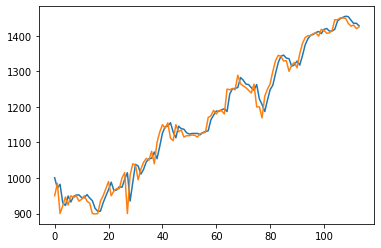

In [19]:
import matplotlib.pyplot as plt

plt.plot(y_pred)
plt.plot(y_train)

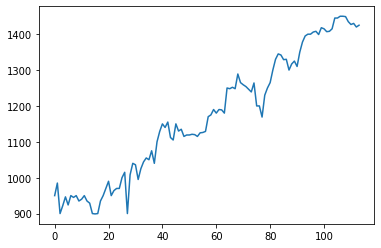